In [12]:
!pip install datasets

In [13]:
!pip uninstall -y numpy pandas pyarrow datasets
!pip install "numpy<2" pandas==2.2.2 pyarrow==16.1.0 datasets --force-reinstall

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: pyarrow 16.1.0
Uninstalling pyarrow-16.1.0:
  Successfully uninstalled pyarrow-16.1.0
Found existing installation: datasets 4.0.0
Uninstalling datasets-4.0.0:
  Successfully uninstalled datasets-4.0.0
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached pyarrow-16.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached datasets-4.0.0-py3-none-any.whl.metadata (19 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached filelock-3.19.1-py

In [14]:
from datasets import load_dataset

# Load dataset directly from Hugging Face
dataset = load_dataset("google-research-datasets/go_emotions")

# See available splits (train, validation, test)
print(dataset)
print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


In [15]:
import pandas as pd

# Convert Hugging Face dataset to Pandas
df = dataset['train'].to_pandas()

# Show first 5 rows
df.head(10)

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu
7,We need more boards and to create a bit more s...,"[8, 20]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[27],eczgv1o


In [16]:
# Get label names from dataset features
label_names = dataset['train'].features['labels'].feature.names
print(label_names)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [17]:
example = dataset['train'][8]
decoded_labels = [label_names[i] for i in example['labels']]
print("Text:", example['text'])
print("Emotion:", decoded_labels)

Text: Damn youtube and outrage drama is super lucrative for reddit
Emotion: ['admiration']


In [18]:
import pandas as pd

# Convert Hugging Face dataset split to Pandas
df = dataset['train'].to_pandas()

In [19]:
# Function to decode a list of label indices into names
def decode_labels(label_ids):
    return [label_names[i] for i in label_ids]

# Apply to whole DataFrame
df['decoded_labels'] = df['labels'].apply(decode_labels)

In [20]:
df.head()

,text,labels,id,decoded_labels
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]


In [21]:
df = df.drop(columns=['labels', 'id'])
df.head()

,text,decoded_labels
0,My favourite food is anything I didn't have to...,[neutral]
1,"Now if he does off himself, everyone will thin...",[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[anger]
3,To make her feel threatened,[fear]
4,Dirty Southern Wankers,[annoyance]


In [22]:
df.to_csv("goemotions_train.csv", index=False)
print("Dataset saved as Go_emotions.csv")

Dataset saved as Go_emotions.csv


## CREATING CUSTOM DATASET TO MERGE WITH GOEMOTIONS DATASET

In [24]:
import pandas as pd

labels = ["Confused", "Frustrated", "Engaged", "Disengaged", "Neutral"]

examples = {
    "Confused": [
        "I don’t understand this topic.",
        "Can you explain that again?",
        "I feel lost in this chapter.",
        "I don't understand this topic.",
        "I am not familiar with this concept.",
        "I don't feel confident about this subject.",
        "Am I not doing the right thing?",
        "How do I go about studying this topic?"
    ],
    "Frustrated": [
        "This assignment is impossible.",
        "I studied all night but still don’t get it.",
        "I want to give up on this homework.",
        "This is so annoying.",
        "This is extremely frustrating.",
        "I can't do this anymore.",
        "I am going to give up on this topic.",
        "I don't want to study this anymore.",
        "Is this topic even important?"
    ],
    "Engaged": [
        "This coding exercise was fun!",
        "I really enjoyed today’s lecture.",
        "I feel motivated to study more.",
        "I like this topic.",
    ],
    "Disengaged": [
        "This class is boring.",
        "I stopped paying attention halfway.",
        "I don’t feel like doing this work.",
        "This subject is difficult.",
        "This topic is difficult."
    ],
    "Neutral": [
        "The exam is on Monday.",
        "The lecture started at 9 AM.",
        "The homework is due tomorrow.",
        "This subject is easy.",
        "This topic is easy."
    ]
}

In [25]:
data = []
for label, texts in examples.items():
    for text in texts:
        data.append({"text": text, "label": label})

df_custom = pd.DataFrame(data)

print(df_custom.head())

                                   text     label
0        I don’t understand this topic.  Confused
1           Can you explain that again?  Confused
2          I feel lost in this chapter.  Confused
3        I don't understand this topic.  Confused
4  I am not familiar with this concept.  Confused


In [26]:
df_custom.to_csv("student_feedback.csv", index=False)
print("Dataset saved as student_feedback.csv")

Dataset saved as student_feedback.csv


In [27]:
df_custom.head()

,text,label
0,I don’t understand this topic.,Confused
1,Can you explain that again?,Confused
2,I feel lost in this chapter.,Confused
3,I don't understand this topic.,Confused
4,I am not familiar with this concept.,Confused


In [28]:
df.head()

,text,decoded_labels
0,My favourite food is anything I didn't have to...,[neutral]
1,"Now if he does off himself, everyone will thin...",[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[anger]
3,To make her feel threatened,[fear]
4,Dirty Southern Wankers,[annoyance]


## Merging both the datasets

In [30]:
df_custom['decoded_labels'] = df_custom['label'].apply(lambda x: [x])

df_custom = df_custom.drop(columns=['label'])

In [31]:
df_merged = pd.concat([df, df_custom], ignore_index=True)

print(df_merged.head())
print("Total samples:", len(df_merged))

                                                text decoded_labels
0  My favourite food is anything I didn't have to...      [neutral]
1  Now if he does off himself, everyone will thin...      [neutral]
2                     WHY THE FUCK IS BAYLESS ISOING        [anger]
3                        To make her feel threatened         [fear]
4                             Dirty Southern Wankers    [annoyance]
Total samples: 43441


## Mapping all the 27 emotions to the extra 5 emotions from our custom dataset

In [33]:
mapping = {
    # Confused
    "confusion": "Confused",
    "surprise": "Confused",

    # Frustrated
    "anger": "Frustrated",
    "annoyance": "Frustrated",
    "disapproval": "Frustrated",
    "disappointment": "Frustrated",
    "remorse": "Frustrated",
    "embarrassment": "Frustrated",
    "disgust": "Frustrated",
    "fear": "Frustrated",

    # Engaged
    "admiration": "Engaged",
    "amusement": "Engaged",
    "approval": "Engaged",
    "curiosity": "Engaged",
    "desire": "Engaged",
    "excitement": "Engaged",
    "gratitude": "Engaged",
    "joy": "Engaged",
    "love": "Engaged",
    "optimism": "Engaged",
    "pride": "Engaged",
    "realization": "Engaged",
    "relief": "Engaged",

    # Disengaged
    "boredom": "Disengaged",
    "sadness": "Disengaged",
    "grief": "Disengaged",
    "nervousness": "Disengaged",

    # Neutral
    "neutral": "Neutral"
}

In [34]:
def map_labels(label_list):
    mapped = []
    for l in label_list:
        if l in mapping:
            mapped.append(mapping[l])
    return list(set(mapped))  # remove duplicates in case multiple map to same

df_merged['final_label'] = df_merged['decoded_labels'].apply(map_labels)

print(df_merged[['text', 'decoded_labels', 'final_label']].head())

                                                text decoded_labels  \
0  My favourite food is anything I didn't have to...      [neutral]   
1  Now if he does off himself, everyone will thin...      [neutral]   
2                     WHY THE FUCK IS BAYLESS ISOING        [anger]   
3                        To make her feel threatened         [fear]   
4                             Dirty Southern Wankers    [annoyance]   

    final_label  
0     [Neutral]  
1     [Neutral]  
2  [Frustrated]  
3  [Frustrated]  
4  [Frustrated]  


In [35]:
# For a pandas DataFrame
print(df_merged.columns)
print(dataset["train"].column_names)

Index(['text', 'decoded_labels', 'final_label'], dtype='object')
['text', 'labels', 'id']


/var/folders/j_/87bx_nyn7ld_6h_n906l83lm0000gn/T/ipykernel_4184/1648917651.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


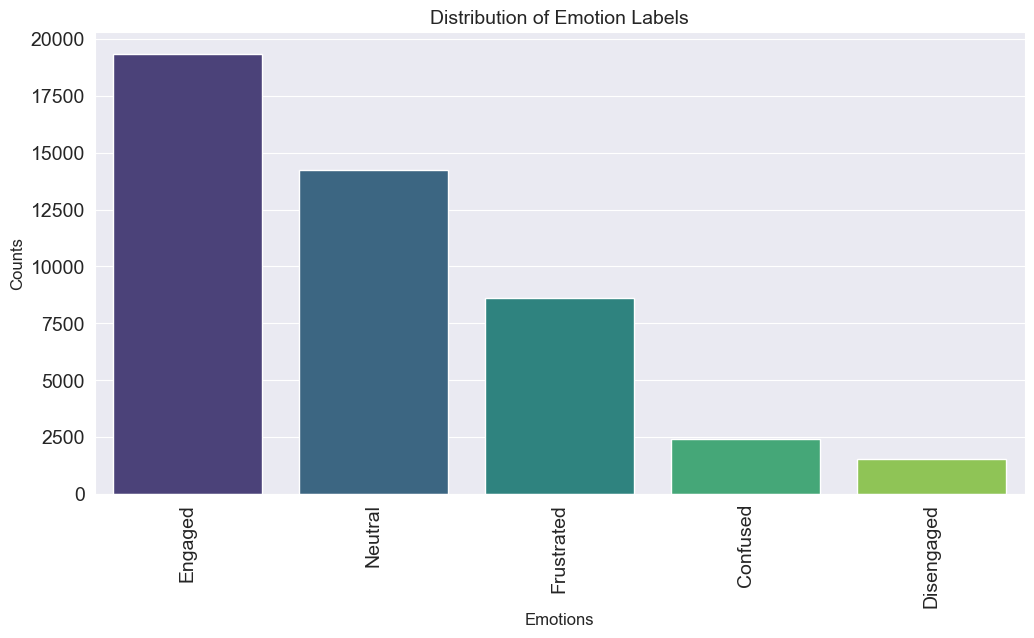

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode the final_label column so each label has its own row
df_exploded = df_merged.explode("final_label")

# Count labels
label_counts = df_exploded["final_label"].value_counts()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

plt.title("Distribution of Emotion Labels", fontsize=14)
plt.xlabel("Emotions", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90)
plt.show()

/var/folders/j_/87bx_nyn7ld_6h_n906l83lm0000gn/T/ipykernel_4184/2218893861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


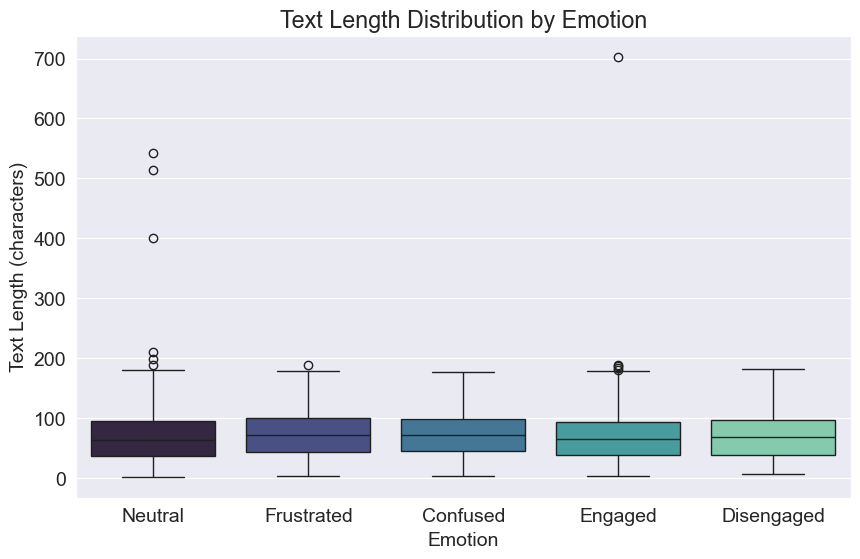

In [37]:
# Create a new column for text length
df_merged["text_len"] = df_merged["text"].apply(len)

# Explode multi-label rows into separate rows
df_exploded = df_merged.explode('final_label').reset_index(drop=True)

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_exploded,
    x='final_label',
    y='text_len',
    palette="mako"
)
plt.title("Text Length Distribution by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Text Length (characters)")
plt.show()

In [38]:
import pandas as pd

df_merged['text_len'] = df_merged['text'].apply(len)

Q1 = df_merged['text_len'].quantile(0.25)
Q3 = df_merged['text_len'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)
print("Lower Bound:", lower_bound, "Upper Bound:", upper_bound)

df_no_outliers = df_merged[(df_merged['text_len'] >= lower_bound) & 
                           (df_merged['text_len'] <= upper_bound)]

print("Original dataset size:", df_merged.shape[0])
print("After outlier removal:", df_no_outliers.shape[0])

Q1: 38.0 Q3: 96.0 IQR: 58.0
Lower Bound: -49.0 Upper Bound: 183.0
Original dataset size: 43441
After outlier removal: 43432


# Adding more features to our dataset

In [40]:
import re

def clean_text(text):
    text = text.lower()                                    # lowercase
    text = re.sub(r"http\S+|www\S+", " URL ", text)        # replace urls
    text = re.sub(r"\d+", " NUM ", text)                   # replace numbers
    text = re.sub(r"[^\w\s]", "", text)                    # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()               # remove extra spaces
    return text

df_no_outliers = df_no_outliers.copy()
df_no_outliers['clean_text'] = df_no_outliers['text'].apply(clean_text)

- This Converts text into a clean, consistent form.
- This reduces noise in the dataset (e.g., "123!!!" and "123" both become "NUM").
- Models don’t inherently understand punctuation, case, or URLs. Cleaning ensures that the algorithm focuses on patterns in language.

In [42]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.4 MB/s  0:00:00 eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


- We download a small pre-trained model(sm) from spaCy cli.
- We disable parser and ner(named entity recognization) because **Parser** helps finds grammatical structure in the text and **NER** helps in recognizing names, places, dates etc. which we don't primarily need for our task.
- Primary focus is on tokenization, lemmatization, and POS tagging.

In [44]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

df_no_outliers['lemmatized_text'] = df_no_outliers['clean_text'].apply(lemmatize_text)

In [45]:
text = "cats and dogs are running"
lemmatize_text(text)

'cat and dog be run'

In [46]:
df_no_outliers['word_count'] = df_no_outliers['lemmatized_text'].apply(lambda x: len(x.split()))
df_no_outliers['char_count'] = df_no_outliers['lemmatized_text'].apply(len)

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    return scores['neg'], scores['neu'], scores['pos'], scores['compound']

df_no_outliers[['sent_neg', 'sent_neu', 'sent_pos', 'sent_compound']] = df_no_outliers['lemmatized_text'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ratnamb.ojha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
sia.polarity_scores("I love this project, but it's a bit tiring")

{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818}

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion

# Word-level TF-IDF (existing)
word_tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Char-level TF-IDF (new)
char_tfidf = TfidfVectorizer(analyzer="char", ngram_range=(3,6), max_features=3000)

# Combine both
text_features = FeatureUnion([
    ("word_tfidf", word_tfidf),
    ("char_tfidf", char_tfidf)
])

In [50]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def get_pos_counts(text):
    doc = nlp(text)
    noun_count = sum(1 for token in doc if token.pos_ == "NOUN")
    verb_count = sum(1 for token in doc if token.pos_ == "VERB")
    adj_count = sum(1 for token in doc if token.pos_ == "ADJ")
    pron_count = sum(1 for token in doc if token.pos_ == "PRON")
    return noun_count, verb_count, adj_count, pron_count

df_no_outliers[["noun_count", "verb_count", "adj_count", "pron_count"]] = (
    df_no_outliers["lemmatized_text"].apply(lambda x: pd.Series(get_pos_counts(x)))
)

In [51]:
df_no_outliers.head()

,text,decoded_labels,final_label,text_len,clean_text,lemmatized_text,word_count,char_count,sent_neg,sent_neu,sent_pos,sent_compound,noun_count,verb_count,adj_count,pron_count
0,My favourite food is anything I didn't have to...,[neutral],[Neutral],59,my favourite food is anything i didnt have to ...,my favourite food be anything I do not have to...,12,58,0.000,1.000,0.000,0.0000,1,1,1,4
1,"Now if he does off himself, everyone will thin...",[neutral],[Neutral],112,now if he does off himself everyone will think...,now if he do off himself everyone will think h...,21,105,0.225,0.632,0.142,-0.2732,3,2,1,4
2,WHY THE FUCK IS BAYLESS ISOING,[anger],[Frustrated],30,why the fuck is bayless isoing,why the fuck be bayless isoing,6,30,0.412,0.588,0.000,-0.5423,2,0,1,0
3,To make her feel threatened,[fear],[Frustrated],27,to make her feel threatened,to make her feel threaten,5,25,0.394,0.606,0.000,-0.3818,0,2,1,1
4,Dirty Southern Wankers,[annoyance],[Frustrated],22,dirty southern wankers,dirty southern wanker,3,21,0.865,0.135,0.000,-0.7506,1,0,2,0


In [52]:
df_no_outliers.describe()

,text_len,word_count,char_count,sent_neg,sent_neu,sent_pos,sent_compound,noun_count,verb_count,adj_count,pron_count
count,43432.000000,43432.000000,43432.000000,43432.000000,43432.000000,43432.000000,43432.000000,43432.000000,43432.000000,43432.000000,43432.000000
mean,68.315205,13.212631,63.558298,0.111866,0.699357,0.188549,0.114070,2.465049,1.973153,1.075889,1.864409
std,36.408026,6.902912,34.415329,0.159516,0.216560,0.205580,0.462911,1.806617,1.454764,1.068188,1.518435
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.984300,0.000000,0.000000,0.000000,0.000000
25%,38.000000,7.000000,35.000000,0.000000,0.560000,0.000000,-0.218300,1.000000,1.000000,0.000000,1.000000
50%,65.000000,13.000000,61.000000,0.000000,0.708000,0.146000,0.000000,2.000000,2.000000,1.000000,2.000000
75%,96.000000,19.000000,89.000000,0.192000,0.856000,0.307000,0.493900,4.000000,3.000000,2.000000,3.000000
max,183.000000,35.000000,180.000000,1.000000,1.000000,1.000000,0.984200,14.000000,9.000000,9.000000,10.000000


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Features: text + numeric
X = df_no_outliers[[
    'clean_text', 'text_len', 'word_count', 'char_count',
    'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound',
    'noun_count', 'verb_count', 'adj_count', 'pron_count'
]]
y = df_no_outliers['final_label']

# Preprocessing for text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Preprocessing for numeric features
scaler = StandardScaler()

# Combine text + ALL numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf, 'clean_text'),
        ('num', scaler, [
            'text_len', 'word_count', 'char_count',
            'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound',
            'noun_count', 'verb_count', 'adj_count', 'pron_count'
        ])
    ]
)

# Choose model (Logistic Regression or SVM)
model = LogisticRegression(max_iter=1000)
# model = SVC(kernel='linear', probability=True)

# Build full pipeline
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', model)
])

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

y_clean = y.apply(lambda lbl: lbl[0] if isinstance(lbl, list) and len(lbl) > 0 else str(lbl))
class_counts = y_clean.value_counts()

# Merge rare classes (<2 samples) into "Other"
y_balanced = y_clean.apply(lambda lbl: lbl if class_counts.get(lbl, 0) >= 2 else "Other")

print("Final class distribution:\n", y_balanced.value_counts())

Final class distribution:
 final_label
Engaged       19339
Neutral       12874
Frustrated     7350
Confused       1820
Disengaged     1369
[]              680
Name: count, dtype: int64


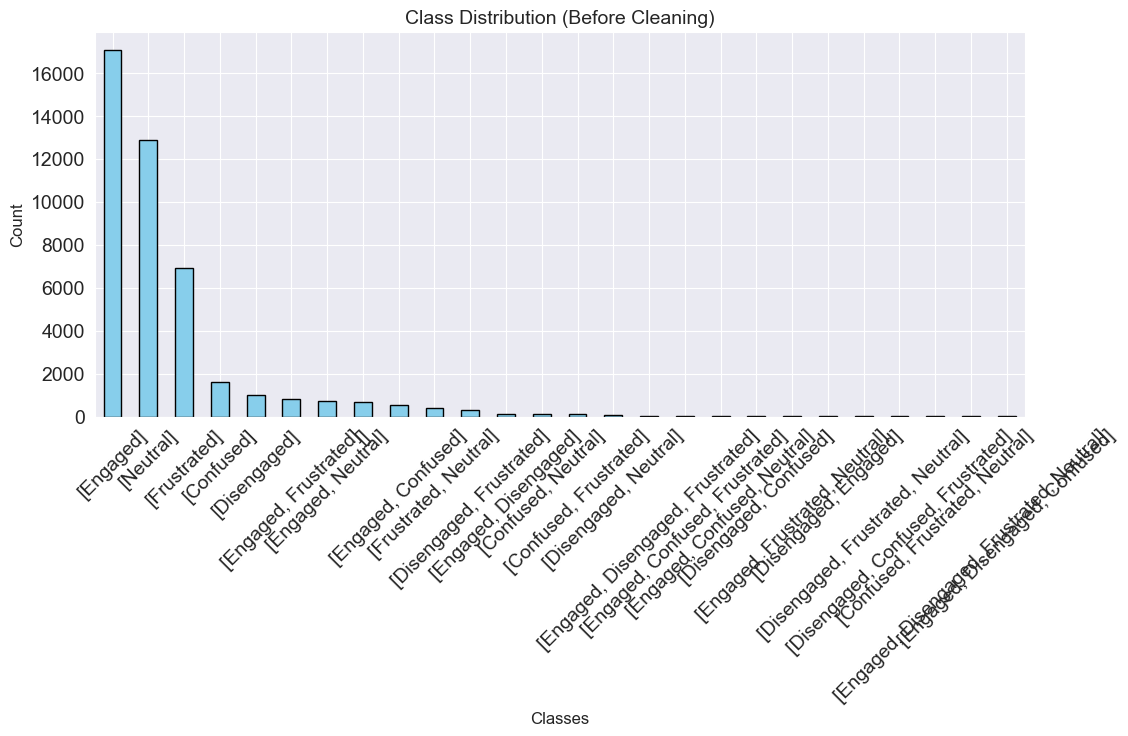

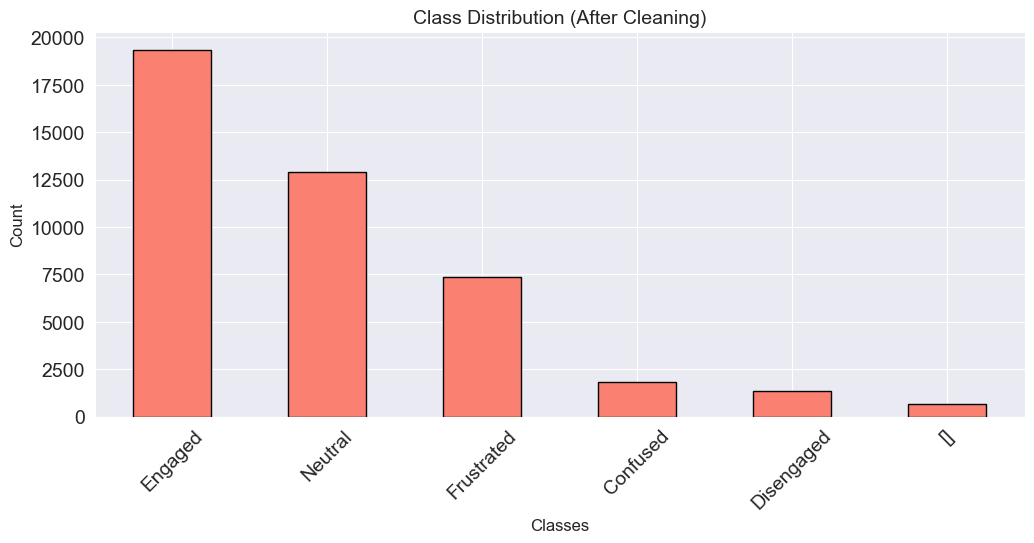

In [55]:
import matplotlib.pyplot as plt

# Before cleaning
plt.figure(figsize=(12,5))
y.value_counts().plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Class Distribution (Before Cleaning)", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# After cleaning
plt.figure(figsize=(12,5))
y_balanced.value_counts().plot(kind='bar', color="salmon", edgecolor="black")
plt.title("Class Distribution (After Cleaning)", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}


for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('classifier', model)
    ])
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("Weighted F1:", round(f1, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.6257
Weighted F1: 0.6126
Classification Report:
               precision    recall  f1-score   support

    Confused       0.56      0.17      0.26       546
  Disengaged       0.62      0.22      0.33       411
     Engaged       0.72      0.77      0.74      5802
  Frustrated       0.55      0.50      0.52      2205
     Neutral       0.54      0.62      0.57      3862
          []       0.62      0.07      0.13       204

    accuracy                           0.63     13030
   macro avg       0.60      0.39      0.43     13030
weighted avg       0.62      0.63      0.61     13030

Confusion Matrix:
 [[  91    2  194   74  185    0]
 [   4   91   85  137   94    0]
 [  30   17 4454  251 1046    4]
 [  11   25  399 1113  655    2]
 [  27   11  991  441 2389    3]
 [   0    1   80   22   86   15]]

=== SVM ===
Accuracy: 0.6246
Weighted F1: 0.6149
Classification Report:
               precision    recall  f1-score   support

    Confused       0

## Insights:
- SVM outperforms both the models in terms of accuracy and weighted f1. **SVM**=0.6335, 0.6223   **Random Forest**=0.6107, 0.5889    **Logistic Regression**=0.6317, 0.6174
- Engaged and Neutral emotions are classified well across models (F1 ≈ 0.60–0.72), due to their higher representation in the dataset.
- Confused and Disengaged are poorly predicted (F1 < 0.40) i.e, the model struggles with underrepresented classes.
- Techniques like class re-weighting, oversampling, or using deep learning transformers (e.g., BERT) could improve minority class detection.

In [58]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [59]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

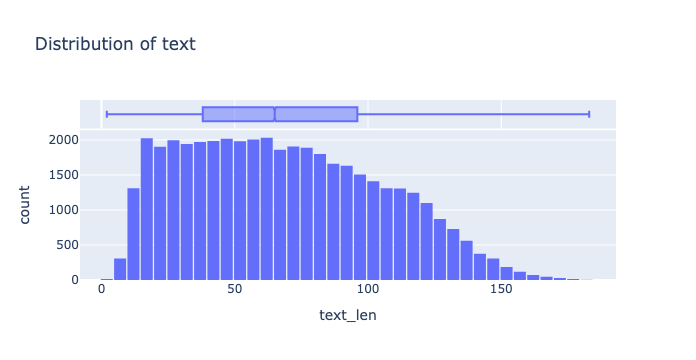

In [63]:
fig = px.histogram(df_no_outliers,
                   x='text_len',
                   marginal='box',
                   nbins=47,
                   title='Distribution of text')
fig.update_layout(bargap=0.1)
fig.show()